In [ ]:
import os
from os import listdir
import cv2 as cv
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import numpy as np
import glob

from skimage.filters import threshold_otsu

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!ls "/content/drive/My Drive/UpdatedDataset/val"
path= "/content/drive/My Drive/UpdatedDataset/val"


A001	AA017  D041   F006   G034   M015A   NL010   O039   S025   U027	 W003
A002	AA018  D042   F007   G035   M016    NL011   O040   S026   U028	 W003A
A003	AA019  D043   F008   G036   M016A   NL012   O041   S026A  U029	 W004
A004	AA020  D044   F009   G036A  M017    NL013   O042   S026B  U029A  W005
A005	AA021  D045   F010   G037   M017A   NL014   O043   S027   U030	 W006
A005A	AA022  D046   F011   G037A  M018    NL015   O044   S028   U031	 W007
A006	AA023  D046A  F012   G038   M019    NL016   O045   S029   U032	 W008
A006A	AA024  D047   F013   G039   M020    NL017   O046   S030   U032A  W009
A006B	AA025  D048   F013A  G040   M021    NL017A  O047   S031   U033	 W009A
A007	AA026  D048A  F014   G041   M022    NL018   O048   S032   U034	 W010
A008	AA027  D049   F015   G042   M022A   NL019   O049   S033   U035	 W010A
A009	AA028  D050   F016   G043   M023    NL020   O050   S034   U036	 W011
A010	AA029  D050A  F017   G043A  M024    NU001   O050A  S035   U037	 W012
A011	AA030  D050B  F018   G044

In [ ]:
myString = """
 A001 AA017  D041   F006   G034   M015A   NL010   O039   S025   U027   W003 
 A002 AA018  D042   F007   G035   M016    NL011   O040   S026   U028   W003A 
 A003 AA019  D043   F008   G036   M016A   NL012   O041   S026A  U029   W004 
 A004 AA020  D044   F009   G036A  M017    NL013   O042   S026B  U029A   W005 
 A005 AA021  D045   F010   G037   M017A   NL014   O043   S027   U030   W006 
 A005A AA022  D046   F011   G037A  M018    NL015   O044   S028   U031   W007 
 A006 AA023  D046A  F012   G038   M019    NL016   O045   S029   U032   W008 
 A006A AA024  D047   F013   G039   M020    NL017   O046   S030   U032A   W009 
 A006B AA025  D048   F013A  G040   M021    NL017A  O047   S031   U033   W009A 
 A007 AA026  D048A  F014   G041   M022    NL018   O048   S032   U034   W010 
 A008 AA027  D049   F015   G042   M022A   NL019   O049   S033   U035   W010A 
 A009 AA028  D050   F016   G043   M023    NL020   O050   S034   U036   W011 
 A010 AA029  D050A  F017   G043A  M024    NU001   O050A  S035   U037   W012 
 A011 AA030  D050B  F018   G044   M024A   NU002   O050B  S035A  U038   W013 
 A012 AA031  D050C  F019   G045   M025    NU003   O051   S036   U039    W014 
 A013 AA032  D050D  F020   G045A  M026    NU004   P001   S037   U040   W014A 
 A014 B001   D050E  F021   G046   M027    NU005   P001A  S038   U041   W015 
 A014A B002   D050F  F021A  G047   M028    NU006   P002   S039   U042   W016 
 A015 B003   D050G  F022   G048   M028A   NU007   P003   S040   V001   W017 
 A016 B004   D050H  F023   G049   M029    NU008   P003A  S041   V001A   W017A 
 A017 B005   D050I  F024   G050   M030    NU009   P004   S042   V001B   W018 
 A017A B005A  D051   F025   G051   M031    NU010   P005   S043   V001C   W018A 
 A018 B006   D052   F026   G052   M031A   NU010A  P006   S044   V001D   W019 
 A019 B007   D052A  F027   G053   M032    NU011   P007   S045   V001E   W020 
 A020 B008   D053   F028   G054   M033    NU011A  P008   S046   V001F   W021 
 A021 B009   D054   F029   H001   M033A   NU012   P009   T001   V001G   W022 
 A022 C001   D054A  F030   H002   M033B   NU013   P010   T002   V001H   W023 
 A023 C002   D055   F031   H003   M034    NU014   P011   T003   V001I   W024 
 A024 C002A  D056   F031A  H004   M035    NU015   Q001   T003A  V002   W024A 
 A025 C002B  D057   F032   H005   M036    NU016   Q002   T004   V002A   W025 
 A026 C002C  D058   F033   H006   M037    NU017   Q003   T005   V003   X001 
 A027 C003   D059   F034   H006A  M038    NU018   Q004   T006   V004   X002 
 A028 C004   D060   F035   H007   M039    NU018A  Q005   T007   V005   X003 
 A029 C005   D061   F036   H008   M040    NU019   Q006   T007A  V006   X004 
 A030 C006   D062   F037   I001   M040A   NU020   Q007   T008   V007   X004A 
 A031 C007   D063   F037A  I002   M041    NU021   R001   T008A  V007A   X004B 
 A032 C008   D064   F038   I003   M042    NU022   R002   T009   V007B   X005 
 A032A C009   D065   F038A  I004   M043    NU022A  R002A  T009A  V008   X006 
 A033 C010   D066   F039   I005   M044    O001    R003   T010   V009   X006A 
 A034 C010A  D067   F040   I005A  N001    O001A   R003A  T011   V010   X007 
 A035 C011   D067A  F041   I006   N002    O002    R003B  T011A  V011   X008 
 A036 C012   D067B  F042   I007   N003    O003    R004   T012   V011A   X008A 
 A037 C013   D067C  F043   I008   N004    O004    R005   T013   V011B   Y001 
 A038 C014   D067D  F044   I009   N005    O005    R006   T014   V011C   Y001A 
 A039 C015   D067E  F045   I009A  N006    O005A   R007   T015   V011D   Y002 
 A040 C016   D067F  F045A  I010   N007    O006    R008   T016   V012   Y003 
 A040A C017   D067G  F046   I010A  N008    O006A   R009   T016A  V012A   Y004 
 A041 C018   D067H  F046A  I011   N009    O006B   R010   T017   V012B   Y005 
 A042 C019   E001   F047   I011A  N010    O006C   R010A  T018   V013   Y006 
 A042A C020   E002   F047A  I012   N011    O006D   R011   T019   V014   Y007 
 A043 C021   E003   F048   I013   N012    O006E   R012   T020   V015   Y008 
 A043A C022   E004   F049   I014   N013    O006F   R013   T021   V016   Z001 
 A044 C023   E005   F050   I015   N014    O007    R014   T022   V017   Z002 
 A045 C024   E006   F051   K001   N015    O008    R015   T023   V018   Z002A 
 A045A D001   E007   F051A  K002   N016    O009    R016   T024   V019   Z002B 
 A046 D002   E008   F051B  K003   N017    O010    R016A  T025   V020   Z002C 
 A047 D003   E008A  F051C  K004   N018    O010A   R017   T026   V020A   Z002D 
 A048 D004   E009   F052   K005   N018A   O010B   R018   T027   V020B   Z003 
 A049 D005   E009A  F053   K006   N018B   O010C   R019   T028   V020C   Z003A 
 A050 D006   E010   G001   K007   N019    O011    R020   T029   V020D   Z003B 
 A051 D007   E011   G002   K008   N020    O012    R021   T030   V020E   Z004 
 A052 D008   E012   G003   L001   N021    O013    R022   T031   V020F   Z004A 
 A053 D008A  E013   G004   L002   N022    O014    R023   T032   V020G   Z005 
 A054 D009   E014   G005   L002A  N023    O015    R024   T032A  V020H   Z005A 
 A055 D010   E015   G006   L003   N024    O016    R025   T033   V020I   Z006 
 A056 D011   E016   G006A  L004   N025    O017    R026   T033A  V020J   Z007 
 A057 D012   E016A  G007   L005   N025A   O018    R027   T034   V020K   Z008 
 A058 D013   E017   G007A  L006   N026    O019    R028   T035   V020L   Z009 
 A059 D014   E017A  G007B  L006A  N027    O019A   R029   T036   V021   Z010 
 A060 D015   E018   G008   L007   N028    O020    S001   U001   V022   Z011 
 A061 D016   E019   G009   L008   N029    O020A   S002   U002   V023   Z012 
 A062 D017   E020   G010   M001   N030    O021    S002A  U003   V023A   Z013 
 A063 D018   E020A  G011   M001A  N031    O022    S003   U004   V024   Z014 
 A064 D019   E021   G011A  M001B  N032    O023    S004   U005   V025   Z015 
 A065 D020   E022   G012   M002   N033    O024    S005   U006   V026   Z015A  
 A066 D021   E023   G013   M003   N033A   O024A   S006   U006A  V027   Z015B 
 A067 D022   E024   G014   M003A  N034    O025    S006A  U006B  V028   Z015C 
 A068 D023   E025   G015   M004   N034A   O025A   S007   U007   V028A   Z015D 
 A069 D024   E026   G016   M005   N035    O026    S008   U008   V029   Z015E 
 A070 D025   E027   G017   M006   N035A   O027    S009   U009   V029A   Z015F 
 AA001 D026   E028   G018   M007   N036    O028    S010   U010   V030   Z015G 
 AA002 D027   E028A  G019   M008   N037    O029    S011   U011   V030A   Z015H 
 AA003 D027A  E029   G020   M009   N037A   O029A   S012   U012   V031   Z015I 
 AA004 D028   E030   G020A  M010   N038    O030    S013   U013   V031A   Z016 
 AA005 D029   E031   G021   M010A  N039    O030A   S014   U014   V032   Z016A 
 AA006 D030   E032   G022   M011   N040    O031    S014A  U015   V033   Z016B 
 AA007 D031   E033   G023   M012   N041    O032    S014B  U016   V033A   Z016C 
 AA007A D031A  E034   G024   M012A  N042    O033    S015   U017   V034   Z016D 
 AA007B D032   E034A  G025   M012B  NL001   O033A   S016   U018   V035   Z016E 
 AA008 D033   E036   G026   M012C  NL002   O034    S017   U019   V036   Z016F 
 AA009 D034   E037   G026A  M012D  NL003   O035    S017A  U020   V037   Z016G 
 AA010 D034A  E038   G027   M012E  NL004   O036    S018   U021   V037A   Z016H 
 AA011 D035   F001   G028   M012F  NL005   O036A   S019   U022   V038 
 AA012 D036   F001A  G029   M012G  NL005A  O036B   S020   U023   V039 
 AA013 D037   F002   G030   M012H  NL006   O036C   S021   U023A  V040 
 AA014 D038   F003   G031   M013   NL007   O036D   S022   U024   V040A 
 AA015 D039   F004   G032   M014   NL008   O037    S023   U025   W001 
 AA016 D040   F005   G033   M015   NL009   O038    S024   U026   W002 """
myString = (myString.split(" "))
for i in range(len(myString)):
    if(myString[i] == " "):
        myString.pop(i)
# print(len(myString))
while("" in myString):
    myString.remove("")
while("\n" in myString):
    myString.remove("\n")
print(len(myString))
myString.sort()
print(myString)

1072
['A001', 'A002', 'A003', 'A004', 'A005', 'A005A', 'A006', 'A006A', 'A006B', 'A007', 'A008', 'A009', 'A010', 'A011', 'A012', 'A013', 'A014', 'A014A', 'A015', 'A016', 'A017', 'A017A', 'A018', 'A019', 'A020', 'A021', 'A022', 'A023', 'A024', 'A025', 'A026', 'A027', 'A028', 'A029', 'A030', 'A031', 'A032', 'A032A', 'A033', 'A034', 'A035', 'A036', 'A037', 'A038', 'A039', 'A040', 'A040A', 'A041', 'A042', 'A042A', 'A043', 'A043A', 'A044', 'A045', 'A045A', 'A046', 'A047', 'A048', 'A049', 'A050', 'A051', 'A052', 'A053', 'A054', 'A055', 'A056', 'A057', 'A058', 'A059', 'A060', 'A061', 'A062', 'A063', 'A064', 'A065', 'A066', 'A067', 'A068', 'A069', 'A070', 'AA001', 'AA002', 'AA003', 'AA004', 'AA005', 'AA006', 'AA007', 'AA007A', 'AA007B', 'AA008', 'AA009', 'AA010', 'AA011', 'AA012', 'AA013', 'AA014', 'AA015', 'AA016', 'AA017', 'AA018', 'AA019', 'AA020', 'AA021', 'AA022', 'AA023', 'AA024', 'AA025', 'AA026', 'AA027', 'AA028', 'AA029', 'AA030', 'AA031', 'AA032', 'B001', 'B002', 'B003', 'B004', 'B00

In [ ]:
for images in os.listdir(path+("/A001")):
   if (images.endswith(".png")):
    #  img=cv.imread(images)
    #  cv2_imshow(img)
    print(images)

A001_0_9721.png
A001_0_5903.png
A001_0_7884.png
A001_0_1072.png
A001_0_3167.png
A001_0_1868.png
A001_0_2683.png
A001_0_1665.png
A001_0_1226.png
A001_0_4191.png
A001_0_617.png
A001_0_2799.png
A001_0_7533.png
A001_0_1704.png
A001_0_6756.png
A001_0_1044.png
A001_0_9512.png
A001_0_5217.png


In [ ]:


#using Otsu Thresholding

def Otsu(myImage):
  sample_image = cv.imread(myImage)
  img = cv.cvtColor(sample_image,cv.COLOR_BGR2RGB)

  # plt.axis('off')
  # plt.imshow(img)

  img_gray=cv.cvtColor(img,cv.COLOR_RGB2GRAY)

  thresh = threshold_otsu(img_gray)
  img_otsu  = img_gray < thresh

  # plt.imshow(img_otsu)
  
  filtered = filter_image(img, img_otsu)
  filteredBW=cv.cvtColor(filtered,cv.COLOR_RGB2GRAY)
  return filteredBW



def filter_image(image, mask):

    r = image[:,:,0] * mask
    g = image[:,:,1] * mask
    b = image[:,:,2] * mask

    return np.dstack([r,g,b])
# var = Otsu('pic1.jpg')
# filtered = filter_image(var[0], var[1])
# filteredBW=cv.cvtColor(filtered,cv.COLOR_RGB2GRAY)
# plt.axis('off')
# plt.imshow(filtered)
# cv2_imshow(filteredBW)

In [ ]:
from PIL import Image
import glob
image_list = []
for string in myString:
  image_list=[]
  for filename in glob.glob(path+('/'+string+'/*.png')):
      # im=Image.open(filename)
      # image_list.append(im)
      pic=Otsu(filename)
      image_list.append(pic)
  image_no=1
  os.mkdir('/content/drive/Shareddrives/Graduation Project (Kemet)/Datasets/SegmentedDataset/val/'+string)

  for image in image_list:
    name = '/content/drive/Shareddrives/Graduation Project (Kemet)/Datasets/SegmentedDataset/val/'+string+'/'+string+'_' + str(image_no) + '.png'
    # image.save(name,'PNG')
    cv.imwrite(name,image)
    image_no+=1
   

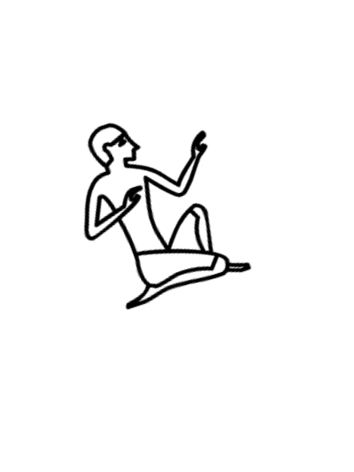

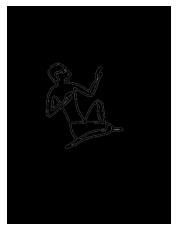

In [ ]:
# for images in os.listdir(path+("/A001")):
#    if (images.endswith(".png")):
#          print(images)
img = cv.imread(path+("/A001/A001_0_9721.png"))
cv2_imshow(img)
blur = cv.GaussianBlur(img,(5,5),0)
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
image_sharp = cv.filter2D(src=blur, ddepth=-1, kernel=kernel)
# cv2_imshow(image_sharp)

from skimage.filters import threshold_otsu

#using Otsu Thresholding

sample_image = cv.imread('pic1.png')
img = cv.cvtColor(image_sharp,cv.COLOR_BGR2RGB)

plt.axis('off')
plt.imshow(img)

img_gray=cv.cvtColor(img,cv.COLOR_RGB2GRAY)

thresh = threshold_otsu(img_gray)
img_otsu  = img_gray < thresh

plt.imshow(img_otsu)

def filter_image(image, mask):

    r = image[:,:,0] * mask
    g = image[:,:,1] * mask
    b = image[:,:,2] * mask

    return np.dstack([r,g,b])

filtered = filter_image(img, img_otsu)

plt.axis('off')
plt.imshow(filtered)